# Module 01: Jupyter Notebook Assignment

## Due: 2021-09-03

## Name: 

### Part I: Instructions

In this part of the assignment, your task is to create a one-dimensional random walk model similar to the one in [the example notebook](./mod01-PythonIntro-1.ipynb) with the following parameters:

* `Nt` = 200
* `mu_x` = 1.5
* `s_x` = 2.1
* `min_x` = 1.25

Where `min_x` is a new parameter that is the _minimum step size_ at each step in the random walk. When you calculate the step size at each step, you will only accept values that are larger than `min_x` by using a `while` loop to keep generating step sizes until the step size exceeds `min_x`. Do this for `Nx` = 1,000 random walkers. 

___Deliverables:___ 

1. Code to create the random walk with comments
2. Reproduce the 2 figures in section 5.1 and 5.2 of the example notebook (__Note__: you will have to adjust the `bins` and `range` parameters provided to histogram). 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Nt = 200
Nx = 1000

mu_x = 1.5
s_x = 2.1
min_x = 1.25


### Part II: Instructions

In this part of the assignment, your task is to create a __two-dimensional__ random walk model. The 2-D random walk is just an extension of the 1-D random walk into a second dimension. Assume that at each step in the random walk, the step size in the x- and y-directions are _independent_ of one another. That is, you do not need to know anything about the step size in the x-direction to calculate the step size in the y-direction and vice versa. Use the following parameters:

* Nt = 300
* Nx = 3
* mu_x = 0.5
* s_x = 1.5
* mu_y = 5.0
* s_y = 2.5

Where `mu_y` and `s_y` are, respectively, the average and standard deviation of the step size in the y-direction.

___Deliverables___

1. Code to create the random walk with comments
2. Plot the position of all three random walkers at each step of their respective random walks on the ___same plot___.

In [7]:
# Parameters coded in from assignment: 
Nt = 300
Nx = 3

mu_x = 0.5
s_x = 1.5
mu_y = 5.0
s_y = 2.5


In [9]:

x = np.zeros(Nt)

# Create a 'for' loop in python for the random walk model. 
for i in np.arange(Nt): 

    # 
    for j in np.arange(Nt):
        x_i = s_x*np.random.randn() + mu_x
        #np.random.rand - generates random numbers 
        while (x_i < min_x): #while x_1 is less than minimum of x.
             x_i = s_x*np.random.randn() + mu_x
    # This is the syntax of a Python 'if' statement. If we're on the first step (i==0), 
    # then there was no previous step, so the position is 0. If (i>0) the previous location
    # was the value of x at step i-1
    if(i==0): 
        x[i] = 0.0 + x_i # The new position is 0.0 plus the random step size
    else:
        x[i] = x[i-1] + x_i # The new position is the previous position plus the random step size
        

Text(0, 0.5, 'Distance Traveled [m]')

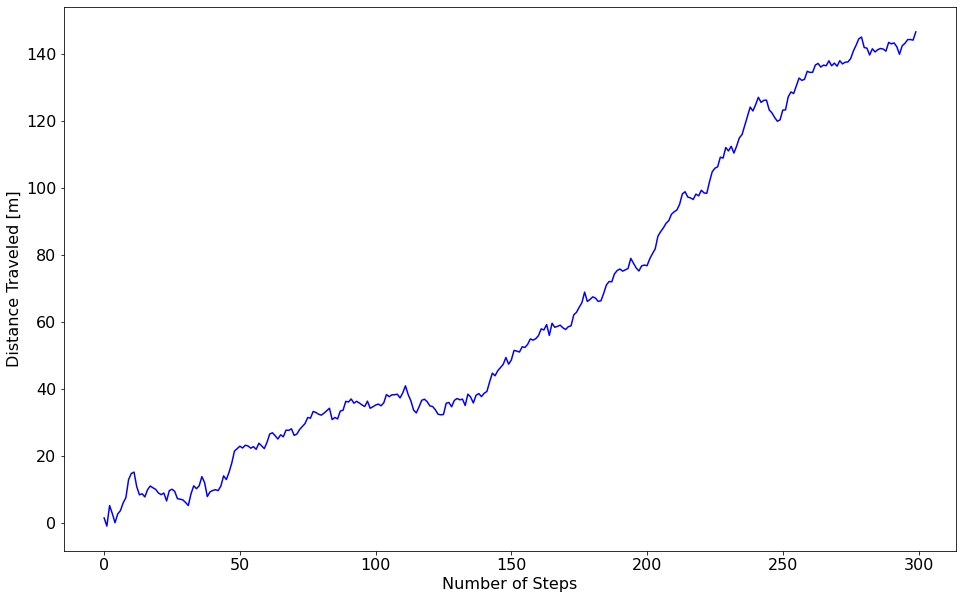

In [5]:
# Set font size for figures.
plt.rcParams.update({'font.size': 16}) 

plt.figure(figsize=(16,10)) # Create a figure and make it 16" wide x 10" tall
plt.plot(np.arange(Nt),x,'b-') # Plot x vs i (created using np.arange(Nt)) as a blue line
plt.xlabel('Number of Steps') # Label the x-axis as the number of steps
plt.ylabel('Distance Traveled [m]') # Label distance traveled

In [7]:
Nx = 1000 # Initialize the number of walkers. Note Nt is still 200
# Create a new container for all walkers at each time step. This will correspond to an 
# array of zeros that has Nt rows and Nx columns. So each row corresponds to a specific
# time step and each column corresponds to a specific walker. 
X = np.zeros((Nt,Nx))

# Similar to the single walker, create a loop for each time step.
for i in np.arange(Nt):

    # The foor loop below loops through each walker. It is 'nested' within the 
    # time for loop
    for j in np.arange(Nx):

        # Calculate the random step size for the j^th walker at the i^th time step
        x_i = s_x*np.random.randn() + mu_x
    
        # Again check to see if we're at the first time step
        if(i==0):
            # If at the first time step, the initial position was 0
            X[i,j] = 0.0 + x_i 
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + x_i 
            
# Just to underscore X[26,156] corresponds to the 27th time step and the 157th walker because 
# Python arrays are zero-based (i.e., the first element is 0).


Text(0, 0.5, 'Distance Traveled [m]')

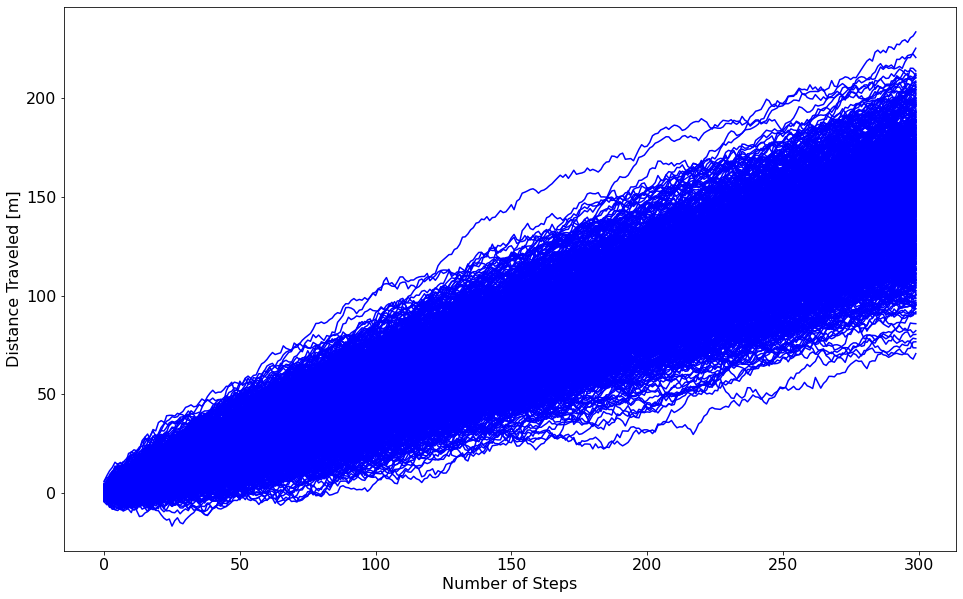

In [8]:
plt.figure(figsize=(16,10)) # Create a new figure and make it 16" wide by 10" tall

plt.plot(np.arange(Nt),X,'b-') # Plot the location of all walkers versus time as blue lines
plt.xlabel('Number of Steps') # Label the x-axis
plt.ylabel('Distance Traveled [m]') # Label the y-axis


Text(0, 0.5, 'Standard Deviation Distance Traveled [m]')

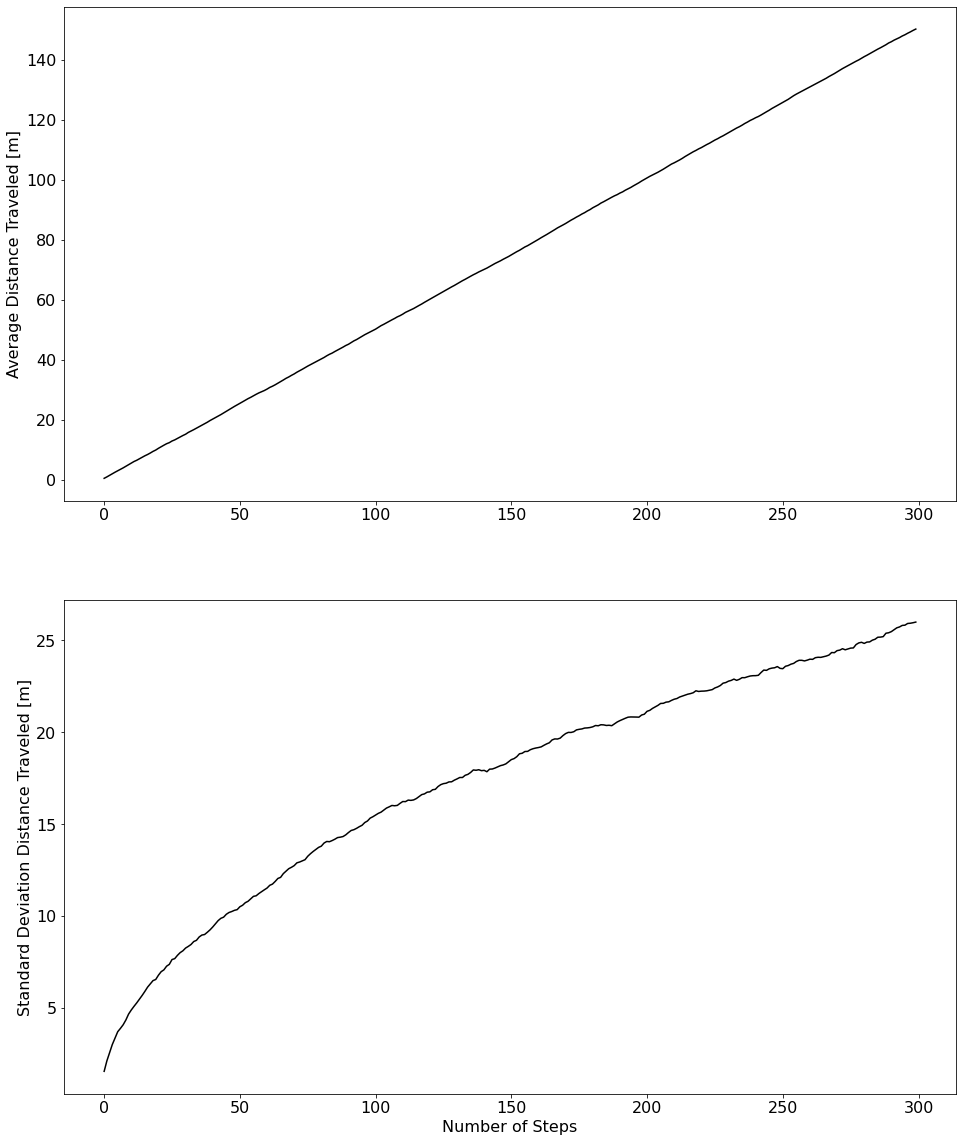

In [9]:
mean_X = np.mean(X,axis=1) # Calculate the average distance of all walkers through time
std_X = np.std(X,axis=1) # Calculate the standard deviation of all walkers through time

plt.figure(figsize=(16,20)) # Create a new figure and make it 16" x 20" 
plt.subplot(2,1,1) # Create a subplot that is 2 rows x 1 column and call the first plot
plt.plot(np.arange(Nt),mean_X,'k-') # Plot the mean position as a black line
plt.ylabel('Average Distance Traveled [m]') # Label the y-axis (our subplots share an x-axis so we will only label one)

plt.subplot(2,1,2) # Create a subplot that is 2 rows x 1 column and call the second plot
plt.plot(np.arange(Nt),std_X,'k-') # Plot the standard deviation in position as a black line
plt.xlabel('Number of Steps') # Now label the x-axis
plt.ylabel('Standard Deviation Distance Traveled [m]') #Label the y-axis

Text(0, 0.5, 'Distance Traveled [m]')

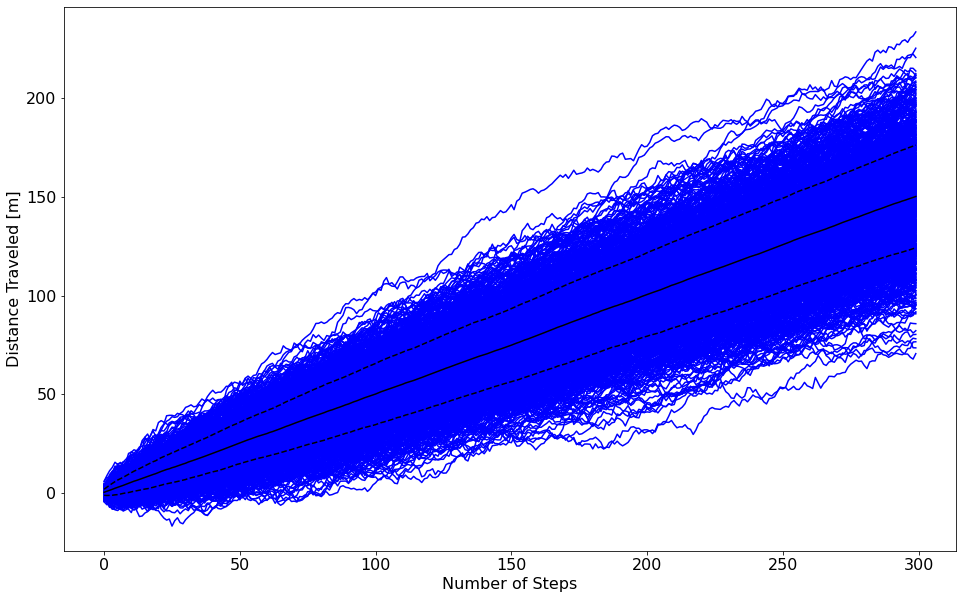

In [10]:
plt.figure(figsize=(16,10)) 

plt.plot(np.arange(Nt),X,'b-') 
plt.plot(np.arange(Nt),mean_X,'k-')
plt.plot(np.arange(Nt),mean_X + std_X, 'k--')
plt.plot(np.arange(Nt),mean_X - std_X, 'k--')
plt.xlabel('Number of Steps') 
plt.ylabel('Distance Traveled [m]') 


Text(0, 0.5, 'Frequency [-]')

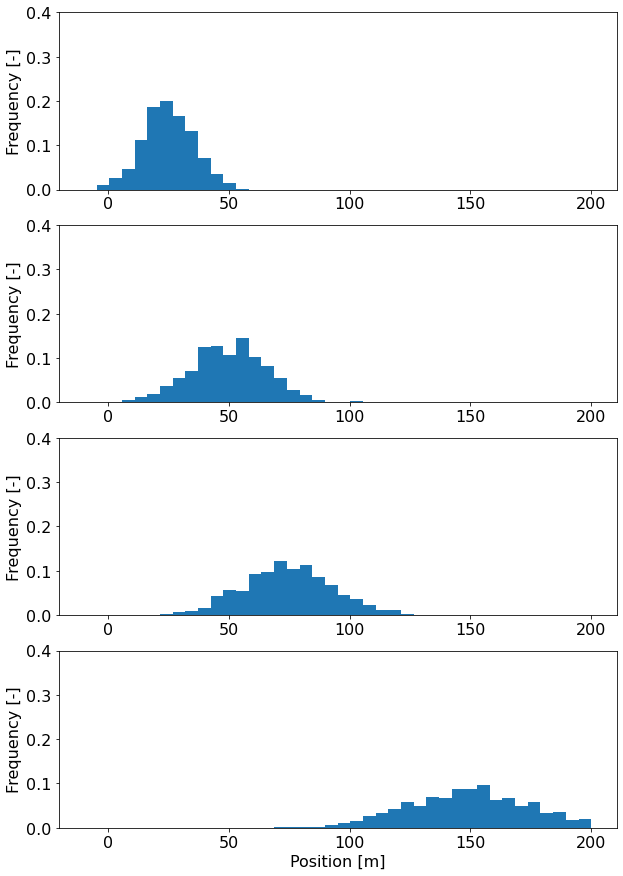

In [11]:

x_50, be_50 = np.histogram(X[49,:], bins=40, range=(-10.0,200))
x_100, be_100 = np.histogram(X[99,:], bins=40, range=(-10.0,200))
x_150, be_150 = np.histogram(X[149,:], bins=40, range=(-10.0,200))
x_200, be_200 = np.histogram(X[-1,:], bins=40, range=(-10.0,200))

plt.figure(figsize=(10,15))
plt.subplot(4,1,1)
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width=(be_50[1]-be_50[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,2)
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,3)
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,4)
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_200)), width=(be_200[1]-be_200[0]))
plt.ylim((0.0,0.4))
plt.xlabel('Position [m]')
plt.ylabel('Frequency [-]')
